## 통계분석

### 통계적 가설 검정  
- 모집단의 실제값이 얼마다 라는 주장에 대해 세운 가설이 통계적으로 유의한지 알아보는 것 
- 즉, 증명된 바 없는 주장이나 가설을 표본 통계량에 기반하여 진위 여부를 증명하는 통계적 추론 방식  
- 모집단의 모수를 추정하는 과정에서 수행  
- 예   
    - 하나의 표본 평균으로 모집단의 평균을 추정하는 과정에서 수행  
    - 두 개의 표본집단으로 두 모집단의 평균을 비교하는 과정에서 수행  

### 통계적 가설 검정 방식
- 주장하는가설과 반대되는 가설을 세우고
- 이 가설이 잘못됐다는 것을 보여줌으로써 
- 주장하는 가설이 참임을 증명하는 방식
- 대립가설(H1) : 주장하는가설 (Alternative Hypothesis)
- 귀무가설(H0) : 반대되는 가설 (Null Hypothesis)
    - 새롭게 주장하는가설이 타당하지 않을 경우
    - 현재 믿어지고 있는 가설로 돌아가게 된다는 의미  

### 가설이 채택되는 과정
- 유의수준 : 귀무가설을 기각하는 기준  
- 유의수준 기준 : 일반적으로 0.05  
- 귀무가설 기각   
    - p-value 값이 유의수준보다 작으면 귀무가설 기각  
    - 이때 대립가설이 유의하다고 함  

### p-value
- 데이터로부터 관측된 유의확률을 나타내는 값
- 수립한 대립가설의 채택 유무를 판단하는 기준으로 사용 
- 유의확률 : 검정통계량 값이 기각역 내에 나타날 수 있는 확률
- p-value 값만 보고 귀무가설을 기각할 것인지 채택할 것인지 바로 알 수 있음


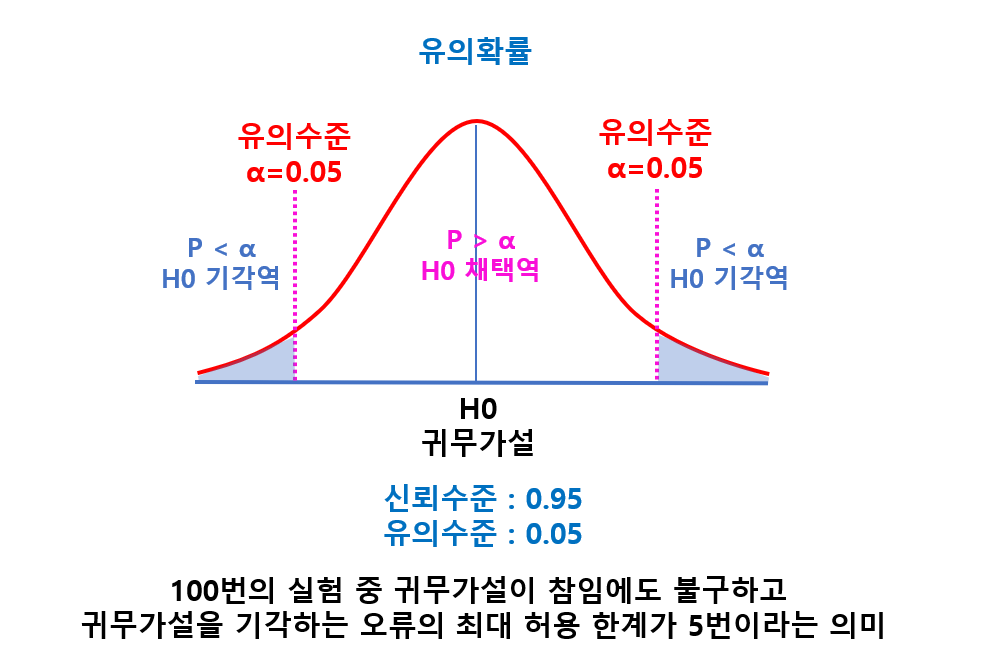

In [ ]:
##########################################################################################

## t-test (t 검정)
- 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법
- 어느 특정 집단의 평균 값을 추정하거나 차이를 검정할 때 사용 
- 종속변수 : 평균값을 가질 수 있는 연속형 변수
- 독립변수 : 범주형 변수 

### 통계적 검정 개념 예
- A 집단과 B 집단에서 표폰을 추출하고, 몸무게의 평균 차이를 비교 했을 때
- 2Kg의 차이가 났다면
- 이 몸무게의 차이는 두 집단의 몸무게가 차이가 난다고 할 수 있을까?

---
- 통계적 분석에서 2Kg의 차이가 나타났더라도
- 분산에 따라 이 차이는 유의할 수도, 유의하지 않을 수도 있다고 봄
- 이처럼 분산을 사용하여 이 차이를 통계적으로 표현한 것을 t 검정통계량(t-test)이라고 함 
- 분석 환경에 따라 t-test 계산 공식 다름



### 대표적인 t-test 분석방법 3가지  
- 단일표본 t-test  (One Sample t-test) : stats.ttest_1samp() 사용 
- 대응표본 t-test (Pared Sample t-test) : stats.ttest_rel(after, before) 사용  
- 독립표본 t-test (Independent Sample t-test)


### 비모수 검정 방법
- 데이터가 특정한 분포를 따르지 않는 경우 수행하는 검정 방법
- 즉, 정규분포를 따르지 않는 경우 수행
- 단일표본 t-test 인 경우 : wilcoxon(data - mu) 사용
- 대응표본 t-test 인 경우 : wilcoxon(before, after) 사용
- 독립표본 t-test 인 경우 : ranksums(a, b) 또는 mannwhitneyu(a, b) 사용  

In [ ]:
##########################################################################################

### 단일표본 t-test (One Sample t-test)
- 단일 모집단에서 연속형 변수의 평균값을 특정 기준값과 비교
- 가정 :모집단의 구성요소들이 정규분포를 이룬다는  가정  
    - 종속변수 : 연속형  
    - 검증하고자 하는 기준값이 있어야 함  
---
- 단계
    - 가설수립
        - 귀무가설(H0) : 모평균의 값은 ~**이다**  (같다(차이가 없다))  
        - 대립가설(H1) : 모평균의 값은 ~이 **아니다**  (같지 않다(차이가 있다))
    - 유의수준 설정 : 기본적으로 0.05 
    - 검정통계량의 값과 p-value(유의 확률) 계산
    - 귀무가설의 기각여부 판단 및 해석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 파이썬을 활용한 단일표본 t-test  예제1  
- 성인 여성 평균 키 데이터 사용 
- 검증 수치 : 163
- 가설 설립    
    - 귀무가설(H0) : 성인 여성 평균 키가 163 cm이다  
    - 대립가설(H1) : 성인 여성 평균 키가 163 cm가 아니다  
- 유의 수준 0.05
- t-test 수행 과정
  - (1) 정규성 검정 : scipy.stats.shapiro() 사용
  - (2) t-test 진행 
    - 정규성을 따르는 경우 : stats.ttest_1samp() 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행 
    
---
- 매번 정규성을 검정하지는 않음
    - 일반적으로 표본수가 30이상인 경우에는 정규성을 만족한다는 가정하에
    - 정규성 검정 수행하지 않고 t-test 수행 

In [4]:
import pandas as pd

In [50]:
data = pd.read_csv('./data/성인여성_키_데이터.txt')
data.head()

,height
0,150.27
1,142.94
2,160.99
3,157.48
4,153.46


In [9]:
# (1) 정규성 검정 수행 : shapiro() 사용 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

from scipy.stats import shapiro
shapiro(data['height'])

# 결과 해석
# pvalue=0.30076
# p-value 값이 유의수전 0.05 보다 크므로 귀무가설 채택
# 결론 : 데이터가 정규분포를 따른다
# -> stats.ttest_1samp()로 t-test 진행 

ShapiroResult(statistic=0.9535375237464905, pvalue=0.30076339840888977)

In [10]:
# (2) 단일 표본 t-test 수행 
# 검증 수치 : 163
# 귀무가설(H0) : 성인 여성 평균 키가 163 cm이다
# 대립가설(H1) : 성인 여성 평균 키가 163 cm가 아니다

import scipy.stats as stats
stats.ttest_1samp(data, 163)

# 결과 해석
# p-value : 0.00654571
# p-value 값이 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 즉, 성인 여성 평균 키가 163 cm가 아니다

TtestResult(statistic=array([-2.97752553]), pvalue=array([0.00654571]), df=array([24]))

In [12]:
data.describe()

,height
count,25.000000
mean,156.937200
std,10.180937
min,137.500000
25%,153.070000
50%,157.480000
75%,164.440000
max,172.360000


### 파이썬을 활용한 단일표본 t-test 예제2
- cats 데이터 사용 
  - Bwt : 몸무게  
  - Hwt : 길이  
- 고양이들의  평균 몸무게가 2.6Kg인지 아닌지 통계적 검정 수행하고 결과 해석
- 가설 설립    
    - 귀무가설(H0) : 고양이의 평균 몸무게는 2.6Kg이다  
    - 대립가설(H1) : 고양이의 평균 몸무게는 2.6Kg이 아니다  
- 유의 수준 0.05
- t-test 수행 과정
  - (1) 정규성 검정 : scipy.stats.shapiro() 사용
  - (2) t-test 진행 
    - 정규성을 따르는 경우 : stats.ttest_1samp() 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행 : stats.wilcoxon() 사용 

In [13]:
import pandas as pd
cats = pd.read_csv('./data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [14]:
# (1) 정규성 검정 수행 
# 고양이 몸무게 값으로 shapiro test를통해 정규성 검정
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다  

from scipy.stats import shapiro
shapiro(cats['Bwt'])

# 결과 해석
# pvalue=6.730228778906167e-05
# p-value 값이 유의수준 0.05보다 작으므로 귀무가설 기각
# 즉, 데이터가 정규분포를 따르지 않는다  
# -> wilcoxon test로 t-test 진행 

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [16]:
# (2) wilcoxon test로 t-test 진행
# 귀무가설(H0) : 고양이의 평균 몸무게는 2.6Kg이다
# 대립가설(H1) : 고양이의 평균 몸무게는 2.6Kg이 아니다

from scipy.stats import wilcoxon

# 검증수치 mu 값 설정
mu = 2.6

wilcoxon(cats.Bwt - mu)

# 결과 해석
# pvalue=0.02524520
# p-value 값이 유의수준 0.05보다 작으므로 귀무가설 기각, 대립가설 채택
# 고양이의 평균 몸무게는 2.6Kg이 아니다
# 즉, 유의수준 0.05 하에 고양이의 몸무게는 2.6Kg이라고 할 수 없다 

WilcoxonResult(statistic=3573.0, pvalue=0.025245202948140935)

In [ ]:
#################################################################################################

### 대응표본 t-test (Paired Sample t-test)
- 쌍체 표본 t-test (t 검정) 
- 단일 모집단에 대해 어떠한 처리를 가했을 때 (변화를 주었을 때) 
  - 처리 전후에 따른 평균의 차이를 비교할 때 사용(효과가 있었는지 확인)
  - 예 
      - 수명영양제를 복용했을 때 복용전과 후의 차이 (수면영양제가 효과가 있었는지)
      - 보충수업을 했을 때 보충수업 전과 후의 차이 (보충수업을 했을 때 효과가 있었는지)  
- 표본 내에 개체들에 대해 두 번의 측정 수행 (같은 집단이므로 등분산성 만족)
- 가정 :처리 전후 데이터의 차이(difference)가 정규성을 만족해야 한다 
- 가설 수립
  - 귀무가설(H0) : 두 모평균 사이의 차이는 없다. (같다)  
  - 대립가설(H1) : 두 모평균 사이의 차이가 있다. (같지 않다)    
- 유의수준 설정 : 기본적으로 0.05  
- 검정통계량 및 p-value 계산  
- stats.ttest_rel()로 t-test 진행  

### 대응표본 t-test 예제1
- 10명의 환자를 대상으로 수면영양제 복용 전과 후의 수면시간을 측정하고
- 영양제의 효과가 있는지 판단  
- t-test 수행 과정
    - (1) 정규성 검정 수행 : scipy.stats.shapiro() 사용
        - 귀무가설(H0) : 데이터가 정규분포를 따른다
        - 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 
        - 정규성 확인 : 전후 데이터 차이에 대해 정규성 확인 
            - shapiro(data.diff) 사용 
        - 정규성을 따르는 경우 : stats.ttest_rel() 사용
        - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행. stats.wilcoxon() 사용  
    - (2) 대응표본 t-test 수행  
        - 귀무가설(H0) : 수면제 복용 전과 후의 수면시간 차이는 없다. (같다)  
        - 대립가설(H1) : 수면제 복용 전과 후의 수면시간 차이는 있다. (같지 않다)  


In [17]:
# 데이터 불러오기 및 확인 
import pandas as pd 

# 수면시간
hours = {
           'before': [7, 3, 4 ,5 ,2, 1, 6, 6, 5, 4],
           'after':  [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]
        }

data = pd.DataFrame(hours)
data


,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [18]:
data['diff'] = data['after'] - data['before']
data.head()

,before,after,diff
0,7,8,1
1,3,4,1
2,4,5,1
3,5,6,1
4,2,2,0


In [19]:
# (1) 정규성 검정 수행 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

# 정규성 확인 : 전후 데이터 차이에 대해 정규성 확인
# shapiro(data.diff) 사용

from scipy.stats import shapiro
shapiro(data['diff'])

# 결과 해석
# pvalue=0.021947
# p-value 값이 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 즉, 데이터가 정규분포를 따르지 않는다
# --> stats.wilcoxon()로 t-test 진행 

ShapiroResult(statistic=0.8148399591445923, pvalue=0.021947985514998436)

In [21]:
# (2) 대응표본 t-test 수행
# 귀무가설(H0) : 수면제 복용 전과 후의 수면시간 차이는 없다. (같다)
# 대립가설(H1) : 수면제 복용 전과 후의 수면시간 차이는 있다. (같지 않다)

from scipy.stats import wilcoxon
wilcoxon(data['before'], data['after'])

# 결과 해석
# pvalue=0.008299215
# p-value 값이 유의수준 0.05 보다 작으므로
# 귀무가설 기각, 대립가설 채택 
# 수면제 복용 전과 후의 수면시간 차이는 있다. (같지 않다)
# 수명영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의미하며
# 평균 확인 후
# 영양제를 복용한 후 수면시간이 증가했다는 결론 도출 (수면제가 효과가 있었다)

WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

In [23]:
data.mean()

before    4.3
after     5.3
diff      1.0
dtype: float64

### 대응표본 t-test 예제2
- 다이어트 약의 효과가 있었는지 다이어트전, 후 비교 
- 사용 데이터 : 다이어트약_효과검증.csv

- (1) 정규성 검정 수행 : scipy.stats.shapiro() 사용
    - 귀무가설(H0) : 데이터가 정규분포를 따른다
    - 대립가설(H1) : 데이터가 정규분포를 따르지 않는다
    - 정규성을 따르는 경우 : stats.ttest_rel(after, before) 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행. stats.wilcoxon() 사용 
        - stats.wilcoxon() : 대응표본 t검정에 사용하는 비모수적 검정 방법  
- (2) 대응표본 t-test 수행
    - 귀무가설(H0) : 다이어트약 복용 전과 후의 몸무게의 차이는 없다. (같다)
    - 대립가설(H1) : 다이어트약 복용 전과 후의 몸무게의 차이가 있다. (같지 않다)

In [52]:
import pandas as pd
data = pd.read_csv("./data/다이어트약_효과검증.csv")
data.head()

,다이어트전(kg),다이어트후(kg)
0,87.41,88.30
1,81.05,76.21
2,60.72,53.34
3,81.02,78.21
4,75.75,76.74


In [25]:
# diff 컬럼 추가
data['diff'] = data['다이어트후(kg)']-data['다이어트전(kg)']
data.head()

,다이어트전(kg),다이어트후(kg),diff
0,87.41,88.30,0.89
1,81.05,76.21,-4.84
2,60.72,53.34,-7.38
3,81.02,78.21,-2.81
4,75.75,76.74,0.99


In [26]:
# (1) 정규성 검정 수행 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

# 정규성 확인 : 전후 데이터 차이에 대해 정규성 확인

from scipy.stats import shapiro
shapiro(data['diff'])

# 결과 해석
# pvalue=0.289212
# p-value 값이 유의수준 0.05 보다 크므로 귀무가설 채택
# 즉, 데이터가 정규분포를 따른다
# --> stats.ttest_rel()로 t-test 진행

ShapiroResult(statistic=0.9724074006080627, pvalue=0.28921201825141907)

In [27]:
# (2) 대응표본 t-test 수행 
stats.ttest_rel(data['다이어트후(kg)'], data['다이어트전(kg)'])

# 결과 해석
# pvalue = 5.370404098342324e-13
# p-value 값이 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 다이어트약 복용 전과 후의 몸무게의 차이가 있다 
# 평균 확인 :  73.4002  -> 69.0636
# 다이어트 약의 효과가 있다 

TtestResult(statistic=-9.70596986565785, pvalue=5.370404098342324e-13, df=49)

In [28]:
data['다이어트전(kg)'].mean()
data['다이어트후(kg)'].mean()

73.4002

69.0636

In [ ]:
###################################################################################################

### 독립표본 t-test (Independent Sample t-test) 
- 두 개의 독립된 모집단의 평균을 비교할 때 사용
- 따라서 모집단, 모수, 표본이 모두 두 개씩 존재 
- 정규성, 등분산성 가정 
    - 두 모집단은 정규성을 만족해야 한다
        - 각 집단에 정규성 검정 수행  
    - 두 모집단의 분산이 서로 같아야 한다 (등분산성 가정)    
- 가설 수립
    - 귀무가설(H0) : 두 모평균 사이의 차이는 없다. (같다)
    - 대립가설(H1) : 두 모평균 사이의 차이가 있다. (같지 않다)
- 유의수준 설정 : 기본적으로 0.05
- 검정통계량 및 p-value 계산   
- stats.ttest_ind()로 t-test 진행 
---
- 정규성 검정 (Yes) -> 등분산 검정 (Yes) -> stats.ttest_ind(, equal_var=Ture) 사용 
- 정규성 검정 : 각 표본에 shapiro() 수행 
    - 비정규성인 경우  
        - 윌콕슨의 순위합 검정 수행 : ranksums() 사용 : 두 표본의 중앙값이 동일한지 검정 
        - 또는 mannwhitneyu() 사용 : 동일   
- 등분산 검정   
    - Bartlett(정규분포인 경우) 또는 Levene(정규분포 가정할 수 없는 경우) 검정 수행  
    - 비등분산성인 경우 : stats.ttest_ind(, equal_var=False) 사용 

### 독립표본 t-test 예제1
- 반별_점수.csv 사용 
- 반별 평균 비교 : 서로 다른 데이터의 평균 비교
- 가설 수립
    - 귀무가설(H0) : 두 반의 평균은 같다
    - 대립가설(H1) : 두 반의 평균은 차이가 있다 (같지 않다)

In [54]:
data = pd.read_csv("./data/반별_점수.csv")
data.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [33]:
group_A = data.loc[data.반=='A', '점수']
group_B = data.loc[data.반=='B', '점수']
group_A
group_B

0     73
1     69
2     71
3     71
4     73
5     67
6     73
7     69
8     62
9     74
10    68
11    66
12    70
13    82
14    70
15    65
16    76
17    73
18    58
19    81
Name: 점수, dtype: int64

20    63
21    56
22    73
23    61
24    55
25    77
26    75
27    65
28    61
29    55
Name: 점수, dtype: int64

In [34]:
# (1) 정규성 검정
# 각 포본에 대해 정규성 검정 수행
shapiro(group_A)
shapiro(group_B)

# 결과 해석 
# p-value가 모두 유의수준 0.05 보다 크므로 귀무가설 채택
# 모두 정규분포 이다 
# -> 등분산 검정 수행 

ShapiroResult(statistic=0.9696965217590332, pvalue=0.7484514117240906)

ShapiroResult(statistic=0.8888435363769531, pvalue=0.16456004977226257)

In [35]:
# (2) 등분산 검정
# Bartlett(정규분포인 경우) 또는 Levene(정규분포 가정할 수 없는 경우) 검정 수행
# Bartlett 사용

from scipy.stats import bartlett
bartlett(group_A, group_B)

# 결과 해석
# pvalue=0.1819074
# p-value가 유의수준 0.05 보다 크므로 귀무가설 채택 
# 등분산성을 만족한다 
# --> t-test 수행 시 equal_var=Ture 설정 

BartlettResult(statistic=1.7819711940957452, pvalue=0.18190746134261437)

In [37]:
# (3) 독립표본 t-test 수행 : ttest_ind() 사용
# 등분산성을 만족하므로 equal_var=True 로 설정

from scipy.stats import ttest_ind
ttest_ind(group_A, group_B, equal_var=True) 

# 결과 해석 
# pvalue=0.01801
# p-value 값이 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 대립가설(H1) : 두 반의 평균은 차이가 있다 (같지 않다)
# 평균 확인 : 70.55 : 64.1

TtestResult(statistic=2.5128526794964134, pvalue=0.01801095352893767, df=28.0)

In [38]:
# 또는 
# import scipy.stats as stats
# stats.ttest_ind(group_A, group_B, equal_var=True) 
# 동일 표현

TtestResult(statistic=2.5128526794964134, pvalue=0.01801095352893767, df=28.0)

In [39]:
group_A.mean()
group_B.mean()

70.55

64.1

### 독립표본 t-test 예제2
- cats 데이터 사용
- 수컷 고양이와 암컷 고양이의 몸무게 차이 비교
- 가설 수립
    - 귀무가설(H0) : 수컷과 암컷 고양이의 몸무게 차이는 없다. (같다)
    - 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이가 있다. (같지 않다)

- (1) 정규성 검정 수행
- (2) 등분산성 검정 수행
- (3) 독립표본 t-test 수행
- 독립표본 t-test 수행 단계
    - 정규성 검정 (Yes) -> 등분산 검정 (Yes) -> stats.ttest_ind(, equal_var=Ture) 사용   
    - 비정규성인 경우 : 윌콕슨 순위합 검정 사용(ranksums(A,B)) 또는 만-위트니 U 검정 사용(mannwhitneyu(A,B))
    - 비등분산성인 경우 :  stats.ttest_ind(, equal_var=False) 사용 

In [156]:
import pandas as pd
cats=pd.read_csv('./data/cats.csv')
cats
# 표본수가 30이상이면 대표본으로 보고
# 일반적으로 정규성 확인하지 않고 
# 등분산성만 확인하고 t-검정 수행 

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [42]:
# 변수 설정 : 성별로 몸무게(Bwt) 추출해서 변수에 저장 
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']
# female
# male

In [ ]:
# (1) 대표본으로 정규성 검정 수행하지 않고 
# 바로 등분산성 검정 수행 

In [43]:
# (2) 둥분산성 검정 수행 
# Levene(정규분포 가정할 수 없는 경우) 사용 
# levene(female, male)

from scipy.stats import levene
levene(female, male)

# 결과 해석
# pvalue=pvalue=2.043528525518961e-05
# p-value가 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 등분산성을 만족하지 않는다 
# --> 독립표본 t-test 수행 시 equal_var = False 설정

LeveneResult(statistic=19.43101190877999, pvalue=2.043528525518961e-05)

In [44]:
# (3) 독립표본 t-test 수행

from scipy.stats import ttest_ind

ttest_ind(female, male, equal_var=False)

# 결과 해석
# pvalue = 8.831034455859356e-15
# p-value가 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이가 있다.(같지 않다)
# 평균확인 : 2.35 : 2.89

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

In [45]:
female.mean()
male.mean()

2.359574468085107

2.8999999999999995

Text(0.5, 0.98, 'Bar plot')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'female_Bwt')

Text(0, 0.5, 'Count')

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'male_Bwt')

Text(0, 0.5, 'Count')

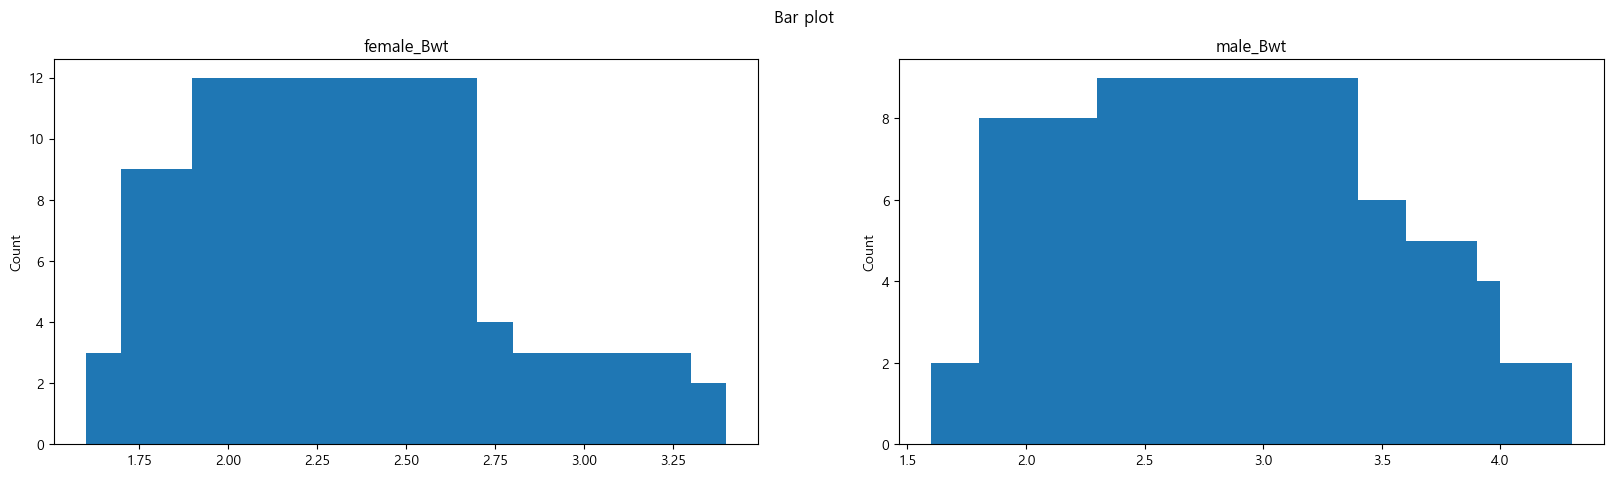

In [131]:
# 데이터 분포 확인

import matplotlib.pyplot as plt

female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

### 독립표본 t-test 예제2에서 정규성 검정을 수행한 경우

In [46]:
# (1) 정규성 검정 수행

shapiro(female)
shapiro(male)

# 결과 해석
# p-value가 female은 유의수준 0.05보다 작으므로 귀무가설 기각, 대립가설 채택
# p-value가 male은 유의수준 0.05보다 크므로 귀무가설 채택
# female은 정규분포가 아니고, male은 정규분포이다
# -> 비정규성으로 윌콕슨 부호순위합검정(ranksums() 사용) 수행 

ShapiroResult(statistic=0.8909614682197571, pvalue=0.00037543251528404653)

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)

In [ ]:
# (2) 독립표본 t-test 수행 
# 비정규성인 경우 윌콕슨 부호순위합검정 수행 :  ranksums(female, male) 사용
# 또는 만-위트니 U 검정 (mannwhitneyu) 수행 : mannwhitneyu(female, male) 사용

In [47]:
# (2.1) ranksums(female, male) 사용

from scipy.stats import ranksums
ranksums(female, male)

# 결과 해석
# pvalue = 8.893855174450822e-11
# p-value가 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이가 있다.(같지 않다)

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

In [48]:
# (2.2) mannwhitneyu(female, male) 사용

from scipy.stats import mannwhitneyu
mannwhitneyu(female, male)

# 결과 해석
# pvalue = 8.200502234321752e-11
# p-value가 유의수준 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택
# 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이가 있다.(같지 않다)

MannwhitneyuResult(statistic=757.5, pvalue=8.200502234321752e-11)

### 자유도 (degree of freedom)
- 표본 값 중에서 자유롭게 변할 수 있는 값의 수  
- 표본수가 n개인 경우 자유도는 n-1 개  
- 예 : 3번의 시험에서 평균이 80  
    - 2번 시험에서 70, 90 이었으면 (자유롭게 변할 수 있는 값 : 2개)  
    - 3번째 시험에서 80이어야 함   
    - 총표본수 : 3  
    - 자유도 : n-1 = 2  
- 그러나 자유도는 n-1만 있는 것이 아니고, 집단간 인 경우, 집단 내 인 경우 전체 변동인 경우에 따라 달라짐
- 표본의 크기에 따라 t-통계량의 분포를 조절하는데 사용    
- 자유도가 커질수록 t-통계량 분포가 정규분포에 가까워짐    
    - 자유도가 클수록 점점 퍼짐의 정도가 작아져서 자유도가 무한대가 되면 정규분포와 같아지게 됨

In [ ]:
########################################################################################

### t-test 검정 수행 방법 정리  
- 단일표본 t-test (One Sample t-test)  
    - 정규성 검정 (shapiro()) -> ttest_1samp() 검정 수행  
    - 비정규성인 경우 : wilcoxon(data - mu)  
- 대응표본 t-test (Pared Sample t-test)  
    - 정규성 검정 (shapiro(차이) Yes) -> ttest_rel() 검정 수행   
    - 비정규성인 경우 : stats.wilcoxon(data['before'], data['after'])  
- 독립표본 t-test (Independent Sample t-test)  
    - 정규성 검정 (각각 shapiro() Yes) -> 등분산성 검정(Yes) -> stats.ttest_ind(, equal_var=Ture)   
    - 비정규성인 경우 :  윌콕슨 부호순위합검정 수행 scipy.stats의 ranksums(A, B) 사용 
        - 또는 만-위트니 U 검정(mannwhitneyu) 수행 : scipy.stats의 mannwhitneyu(A, B) 사용
    - 비등산성인 경우 : ttest_ind(, equal_var=False)  